In [276]:
import torch
from torch import nn
import matplotlib.pyplot as plt

## Linear regression with PyTorch

In [277]:
tensor = torch.arange(0, 50, 0.5)
tensor

tensor([ 0.0000,  0.5000,  1.0000,  1.5000,  2.0000,  2.5000,  3.0000,  3.5000,
         4.0000,  4.5000,  5.0000,  5.5000,  6.0000,  6.5000,  7.0000,  7.5000,
         8.0000,  8.5000,  9.0000,  9.5000, 10.0000, 10.5000, 11.0000, 11.5000,
        12.0000, 12.5000, 13.0000, 13.5000, 14.0000, 14.5000, 15.0000, 15.5000,
        16.0000, 16.5000, 17.0000, 17.5000, 18.0000, 18.5000, 19.0000, 19.5000,
        20.0000, 20.5000, 21.0000, 21.5000, 22.0000, 22.5000, 23.0000, 23.5000,
        24.0000, 24.5000, 25.0000, 25.5000, 26.0000, 26.5000, 27.0000, 27.5000,
        28.0000, 28.5000, 29.0000, 29.5000, 30.0000, 30.5000, 31.0000, 31.5000,
        32.0000, 32.5000, 33.0000, 33.5000, 34.0000, 34.5000, 35.0000, 35.5000,
        36.0000, 36.5000, 37.0000, 37.5000, 38.0000, 38.5000, 39.0000, 39.5000,
        40.0000, 40.5000, 41.0000, 41.5000, 42.0000, 42.5000, 43.0000, 43.5000,
        44.0000, 44.5000, 45.0000, 45.5000, 46.0000, 46.5000, 47.0000, 47.5000,
        48.0000, 48.5000, 49.0000, 49.50

In [278]:
weight = 0.7
bias = 0.3

y = weight * tensor + bias
y

tensor([ 0.3000,  0.6500,  1.0000,  1.3500,  1.7000,  2.0500,  2.4000,  2.7500,
         3.1000,  3.4500,  3.8000,  4.1500,  4.5000,  4.8500,  5.2000,  5.5500,
         5.9000,  6.2500,  6.6000,  6.9500,  7.3000,  7.6500,  8.0000,  8.3500,
         8.7000,  9.0500,  9.4000,  9.7500, 10.1000, 10.4500, 10.8000, 11.1500,
        11.5000, 11.8500, 12.2000, 12.5500, 12.9000, 13.2500, 13.6000, 13.9500,
        14.3000, 14.6500, 15.0000, 15.3500, 15.7000, 16.0500, 16.4000, 16.7500,
        17.1000, 17.4500, 17.8000, 18.1500, 18.5000, 18.8500, 19.2000, 19.5500,
        19.9000, 20.2500, 20.6000, 20.9500, 21.3000, 21.6500, 22.0000, 22.3500,
        22.7000, 23.0500, 23.4000, 23.7500, 24.1000, 24.4500, 24.8000, 25.1500,
        25.5000, 25.8500, 26.2000, 26.5500, 26.9000, 27.2500, 27.6000, 27.9500,
        28.3000, 28.6500, 29.0000, 29.3500, 29.7000, 30.0500, 30.4000, 30.7500,
        31.1000, 31.4500, 31.8000, 32.1500, 32.5000, 32.8500, 33.2000, 33.5500,
        33.9000, 34.2500, 34.6000, 34.95

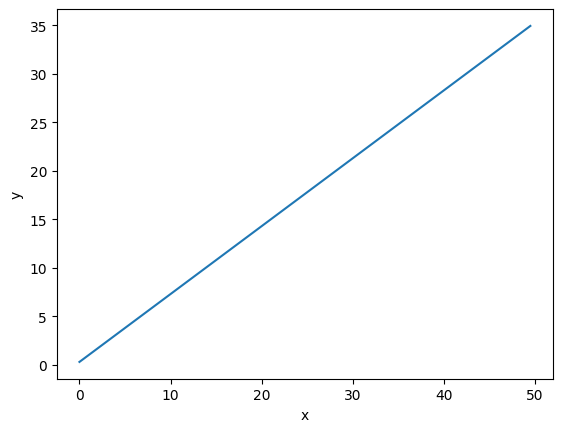

In [279]:
plt.plot(tensor, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [280]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(tensor, y, test_size=0.2, random_state=42)
len(X_train), len(X_test), len(y_train), len(y_test)

(80, 20, 80, 20)

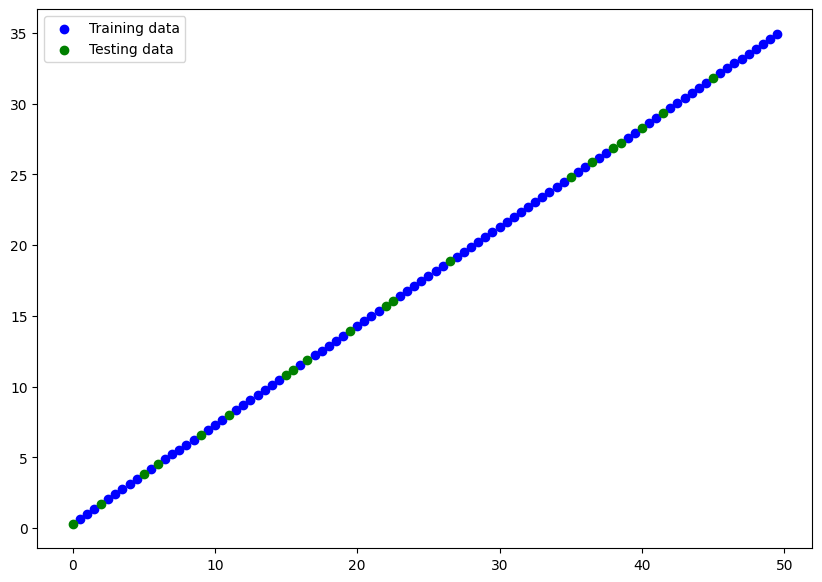

In [281]:
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=None):
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c='b', label='Training data')
    plt.scatter(test_data, test_labels, c='g', label='Testing data')
    if predictions is not None:
        plt.scatter(test_data, predictions, c='r', label='Predictions')
    plt.legend()
    plt.show()

plot_predictions()    

In [282]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

### Using Linear Layer

In [283]:
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1, out_features=1) # 1 input feature, 1 output feature

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

`torch.nn` - a neural networks library deeply integrated with autograd designed for maximum flexibility

`torch.nn.Parameter` - A kind of Tensor, that is automatically registered as a parameter when assigned as an attribute to a Module.

`torch.nn.Module` - Neural network module. Convenient way of encapsulating parameters, with helpers for moving them to GPU, exporting, loading, etc.

`torch.optim` - A package implementing various optimization algorithms. Most commonly used methods are already supported, and the interface is general enough, so that more sophisticated ones can be also easily integrated in the future.

`def forward()` - Defines the computation performed at every call, should be overridden by all subclasses.


## Checking contents of PyTorch model

In [284]:
torch.manual_seed(42)
model = LinearRegressionModel()
list(model.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [285]:
model.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [286]:
torch.manual_seed(42)
model1 = LinearRegressionModelV2()
list(model1.parameters())

[Parameter containing:
 tensor([[0.7645]], requires_grad=True),
 Parameter containing:
 tensor([0.8300], requires_grad=True)]

## Predicting with PyTorch model

In [287]:
with torch.inference_mode(): #switches of gradient calculation. Hence making the prediction faster. Can also use torch.no_grad()
    y_pred = model(X_test)

y_pred

tensor([14.1015,  9.0511, 11.9130,  7.7043,  7.5360,  6.6943,  3.8324, 13.5964,
         1.8123,  0.1288,  3.1590,  5.1792, 12.4180,  5.6842, 15.2799,  0.8022,
        12.9230, 13.0914,  2.1490,  5.3475])

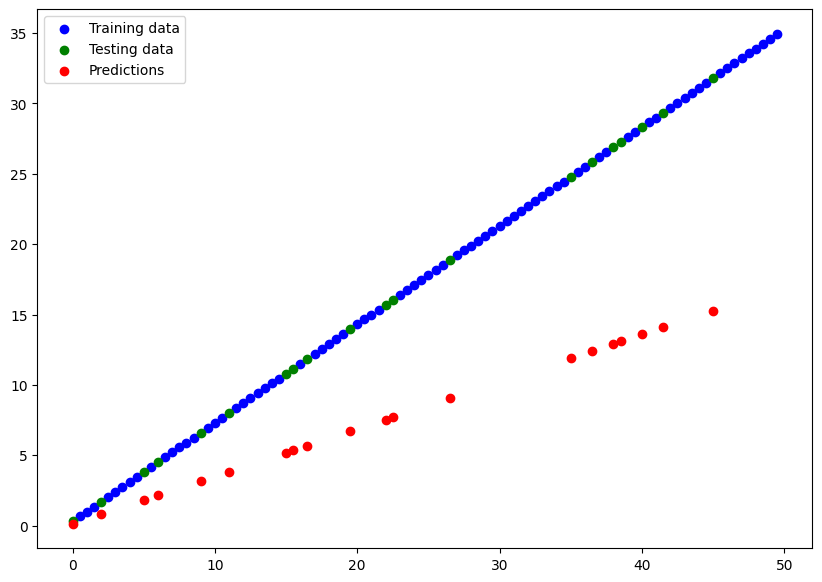

In [288]:
plot_predictions(predictions=y_pred)

## Model Optimization

1. [Loss function](https://neptune.ai/blog/pytorch-loss-functions): function that takes the (output, target) pair of inputs, and computes a value that estimates how far away the output is from the target.
2. [Optimizer](https://pytorch.org/docs/stable/optim.html?highlight=optimizer#torch.optim.Optimizer): function that takes the model’s parameters and adjusts them in order to minimize the loss function.
m

In [289]:
loss_fn = nn.L1Loss()
optimzer = torch.optim.SGD(model.parameters(), lr=0.001)

In [290]:
loss_fn1 = nn.L1Loss()
optimzer1 = torch.optim.SGD(model1.parameters(), lr=0.001)

## Training Loop and Testing Loop

1. Loop over the dataset multiple times.
2. Forwards pass: compute predicted outputs by passing inputs to the model.
3. Calculate the loss.
4. Optimizer zero gradients: reset gradients to zero.
5. Loss backwards pass: move backward through the network while computing the gradient of the loss with respect to each learnable parameter.
6. Optimizer step: to improve the model’s weights.

In [291]:
epochs = 200
epoch_count = []
loss_values = []
test_loss_values = []

loss = ''

torch.manual_seed(42)
for epoch in range(epochs):
    model.train()
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    
    optimzer.zero_grad()
    loss.backward()
    optimzer.step()

    model.eval()
    with torch.inference_mode():
        test_pred = model(X_test)
        test_loss = loss_fn(test_pred, y_test)
    
    if epoch%10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss.detach().numpy())
        test_loss_values.append(test_loss.detach().numpy())
        print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")


print(f"Loss: {loss}")
model.state_dict()

Epoch: 0 | Loss: 9.390172958374023 | Test Loss: 7.689234733581543
Epoch: 10 | Loss: 2.9412636756896973 | Test Loss: 2.0332961082458496
Epoch: 20 | Loss: 0.2557360529899597 | Test Loss: 0.3563118577003479
Epoch: 30 | Loss: 0.1552291214466095 | Test Loss: 0.4390152394771576
Epoch: 40 | Loss: 0.07515136152505875 | Test Loss: 0.5066784024238586
Epoch: 50 | Loss: 0.2733621299266815 | Test Loss: 0.34094077348709106
Epoch: 60 | Loss: 0.16839057207107544 | Test Loss: 0.42732566595077515
Epoch: 70 | Loss: 0.08831212669610977 | Test Loss: 0.4949563145637512
Epoch: 80 | Loss: 0.28823336958885193 | Test Loss: 0.32786768674850464
Epoch: 90 | Loss: 0.18326102197170258 | Test Loss: 0.41425246000289917
Epoch: 100 | Loss: 0.10318324714899063 | Test Loss: 0.48180118203163147
Epoch: 110 | Loss: 0.2696598172187805 | Test Loss: 0.3424464762210846
Epoch: 120 | Loss: 0.1733032763004303 | Test Loss: 0.4219222664833069
Epoch: 130 | Loss: 0.09673982858657837 | Test Loss: 0.4867844581604004
Epoch: 140 | Loss: 0.

OrderedDict([('weights', tensor([0.7025])), ('bias', tensor([0.1643]))])

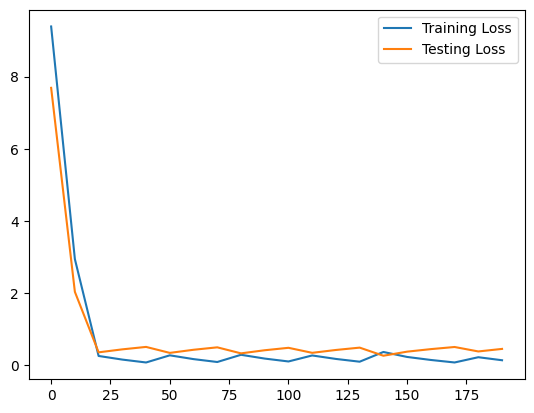

In [292]:
plt.plot(epoch_count, loss_values, label='Training Loss')
plt.plot(epoch_count, test_loss_values, label='Testing Loss')
plt.legend()
plt.show()


In [293]:
# model 1
epochs = 200
epoch_count = []
loss_values = []
test_loss_values = []

loss = ''

torch.manual_seed(42)
for epoch in range(epochs):
    model1.train()
    y_pred = model1(X_train)
    loss = loss_fn1(y_pred, y_train)
    
    optimzer1.zero_grad()
    loss.backward()
    optimzer1.step()

    model.eval()
    with torch.inference_mode():
        test_pred = model1(X_test)
        test_loss = loss_fn1(test_pred, y_test)
    
    if epoch%10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss.detach().numpy())
        test_loss_values.append(test_loss.detach().numpy())
        print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")


print(f"Loss: {loss}")
model.state_dict()

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x80 and 1x1)

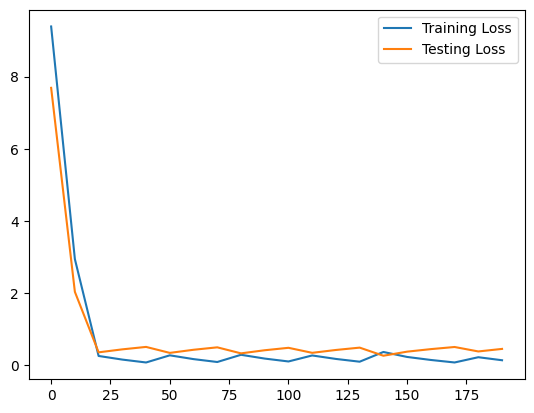

In [ ]:
plt.plot(epoch_count, loss_values, label='Training Loss')
plt.plot(epoch_count, test_loss_values, label='Testing Loss')
plt.legend()
plt.show()


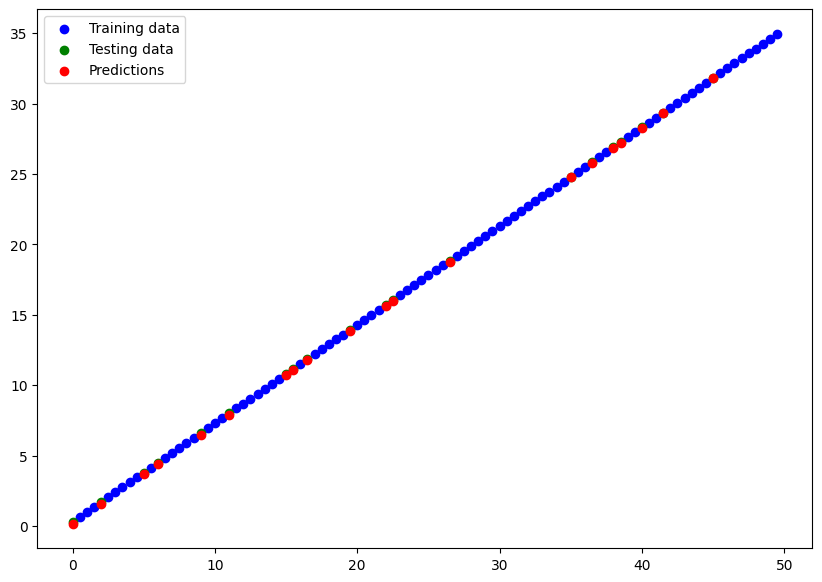

In [ ]:
with torch.inference_mode():
    y_pred = model(X_test)

plot_predictions(predictions=y_pred)

## Saving a model

1. `torch.save(model.state_dict(), PATH)`
2. `torch.load(PATH)`
3. `torch.nn.Module.load_state_dict(torch.load(PATH))`

Use Cases for Saving the Entire Model:
1. Model Deployment: Saving the entire model is useful when you want to deploy your trained model in a production environment. You can save the model as a single file and load it to make predictions without worrying about the model architecture or additional information.

2. Model Transfer: If you need to transfer the model between different machines or frameworks, saving the entire model ensures that you preserve the entire state, including the architecture and learned parameters.

3. Fine-tuning or Continued Training: Saving the entire model allows you to resume training from where you left off. You can load the model and continue training without having to rebuild the architecture or reinitialize the parameters.

Use Cases for Saving the `state_dict()`:
1. Model Checkpoints: Saving the `state_dict()` is commonly used for creating model checkpoints during training. By periodically saving the `state_dict()`, you can resume training from a specific point if the training process is interrupted or you want to try different hyperparameters.

2. Model Variants: If you have multiple models with similar architectures but different configurations or hyperparameters, saving and loading the `state_dict()` allows you to reuse the learned parameters across different model instances.

3. Model Interoperability: The `state_dict()` provides flexibility when working with different versions or variations of the model. You can modify the model architecture, add or remove layers, and load the saved `state_dict()` to initialize the shared parameters.

Remember that both approaches have their merits, and the choice depends on your specific needs and use case. If you require the model architecture and additional information, saving the entire model is more appropriate. On the other hand, if you want flexibility in model architecture or need to share parameters across different model instances, saving and loading the `state_dict()` is a preferred choice.

In [ ]:
from pathlib import Path
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True,exist_ok=True)
MODEL_NAME = 'linear_regression_model.pt'
torch.save(model.state_dict(), MODEL_PATH/MODEL_NAME)

## Loading a model

In [ ]:
loaded_model = LinearRegressionModelV2()
loaded_model.load_state_dict(torch.load(MODEL_PATH/MODEL_NAME))
loaded_model.state_dict()

RuntimeError: Error(s) in loading state_dict for LinearRegressionModelV2:
	Missing key(s) in state_dict: "linear_layer.weight", "linear_layer.bias". 
	Unexpected key(s) in state_dict: "weights", "bias". 